<a href="https://colab.research.google.com/github/jhk990602/datapractice/blob/main/pima_diabetes_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Exploratory Data Analysis (EDA)

## 2. 데이터구성

*   Pregnancies : 임신 횟수
*   Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
*   BloodPressure : 이완기 혈압 (mm Hg)
*   SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
*   Insulin : 2시간 혈청 인슐린 (mu U / ml)
*   BMI : 체질량 지수 (체중kg / 키(m)^2)
*   DiabetesPedigreeFunction : 당뇨병 혈통 기능
*   Age : 나이
*   Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.



## 3.라이브러리 로드

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 4.데이터로드

In [42]:
df = pd.read_csv('/content/drive/MyDrive/boostcourse_data/diabetes.csv')
df.shape

(768, 9)

In [43]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [44]:
#info로 데이터타입, 결측치, 메모리 사용량 등의 정보 보기.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [45]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [46]:
#수치데이터에 대한 요약
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [47]:
#Outcome은 label 값이기 때문에 제외하고 학습과 예측에 사용할 컬럼을 만들기
feature_columns = df.columns[:-1].tolist()

## 5. 결측치 시각화
값을 요약해봤을때 인슐린, 혈압 등 최솟값이 0으로 나오는 값들은 결측치라고 볼수있음.


In [48]:
cols = feature_columns[1:]
cols

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [49]:
#결측치 여부를 나타내는 데이터프레임을 만든다.
#0 값을 결측치라 가정하고 정답(label, target)값을 제외한 컬럼에 대해
#결측치 여부를 구해서 df_null이라는 데이터프레임에 담는다.
df_null = df[cols].replace(0,np.nan)
df_null = df_null.isnull()
df_null.sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

<Axes: >

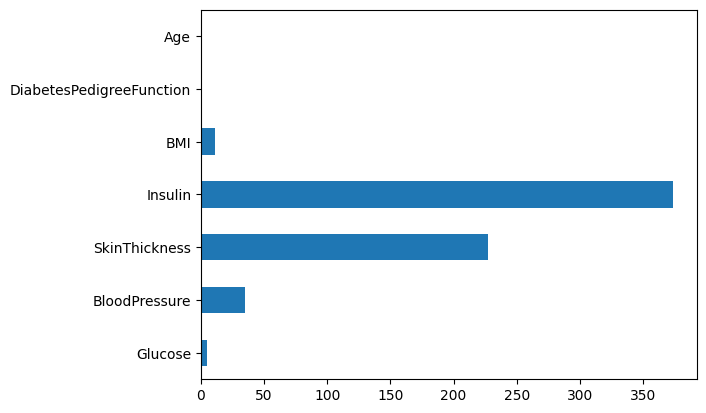

In [50]:
#결측치의 개수를 막대 그래프로 시각화
df_null.sum().plot.barh()

<Axes: >

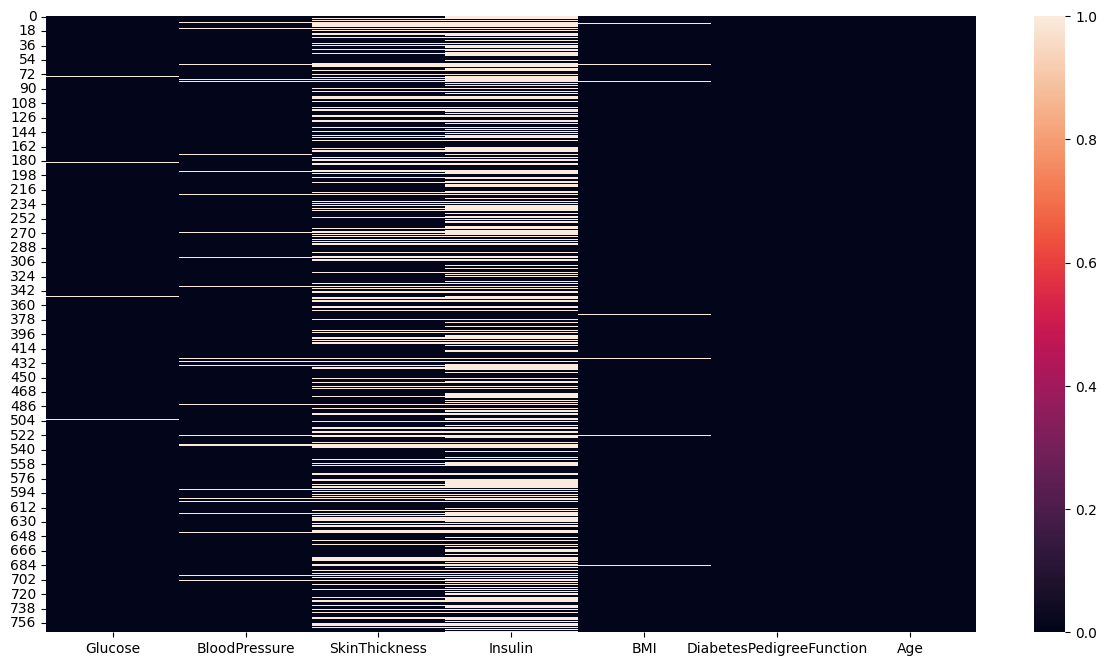

In [51]:
#결측치를 heatmap으로 시각화
plt.figure(figsize=(15,8))
sns.heatmap(df_null)

## 6.정답값
target, label 이라고 부르기도함

In [52]:
#정답값인 Outcome의 갯수
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [53]:
#정답값인 Outcome의 비율
df['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [54]:
#다른 변수와 함께 보기
#임신횟수와 정답값을 비교
#결과를 df_po라는 변수에 지정
df_po = df.groupby(['Pregnancies'])['Outcome'].agg(['mean','count']).reset_index() #groupby의 ()안에는 index사용값, 밖[]에는 value값
#reset_index()를 통해 'Pregnancies'를 column 값으로 사용
df_po

,Pregnancies,mean,count
0,0,0.342342,111
1,1,0.214815,135
2,2,0.184466,103
3,3,0.360000,75
4,4,0.338235,68
5,5,0.368421,57
6,6,0.320000,50
7,7,0.555556,45
8,8,0.578947,38
9,9,0.642857,28


<Axes: >

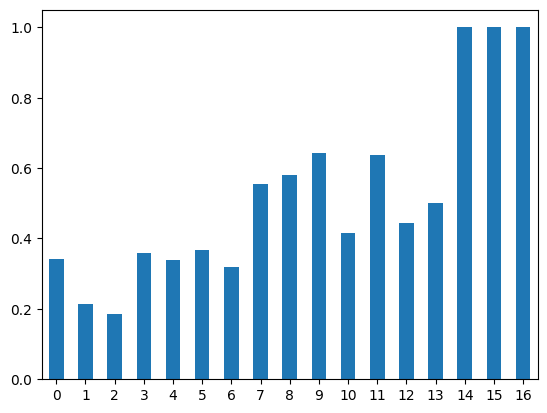

In [55]:
#임싯횟수에 따른 당뇨병 발병 비율
df_po['mean'].plot.bar(rot=0)

## 7. countplot

<Axes: xlabel='Outcome', ylabel='count'>

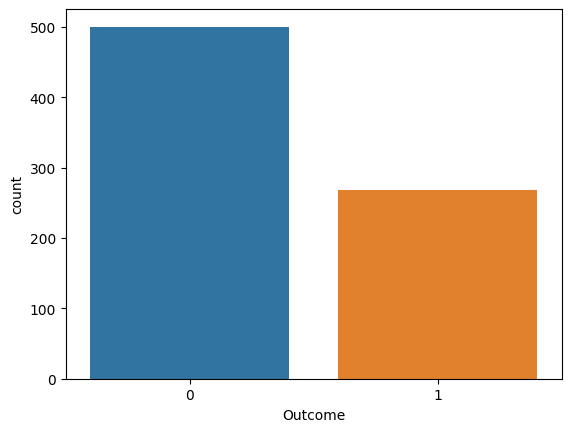

In [56]:
#당뇨병 발병비율을 countplot으로
#당노병 발병 빈도수를 비교
sns.countplot(data=df ,x='Outcome')

<Axes: xlabel='Pregnancies', ylabel='count'>

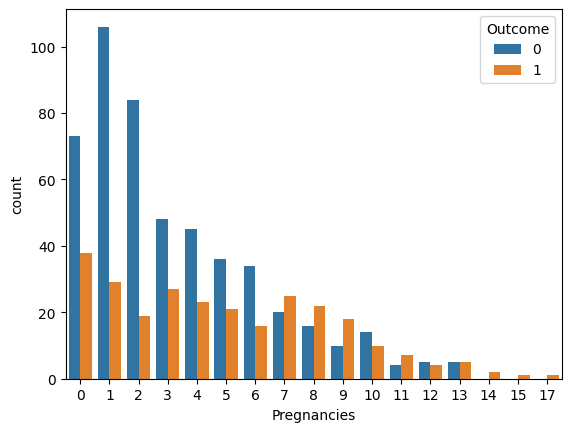

In [62]:
#임신횟수에 따른 당뇨병 발병 빈도수를 비교
sns.countplot(data=df,x='Pregnancies',hue='Outcome')

In [58]:
#임신횟수의 많고 적음에 따라 Pregnancies_high 변수를 만든다.
df['Pregnancies_high'] = df['Pregnancies'] >6
df[['Pregnancies','Pregnancies_high']].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


<Axes: xlabel='Pregnancies_high', ylabel='count'>

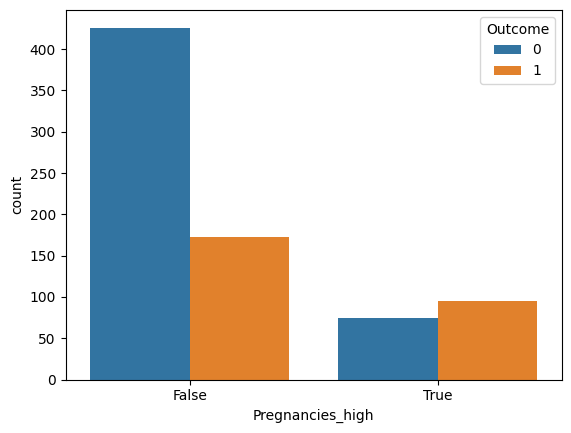

In [63]:
#Pregnancies_high 변수의 빈도수를 countplot 으로 그리고
#Outcome 값에 따라 다른 색상으로 표현
sns.countplot(data=df, x='Pregnancies_high',hue='Outcome')

## 8.barplot

<Axes: xlabel='Outcome', ylabel='BMI'>

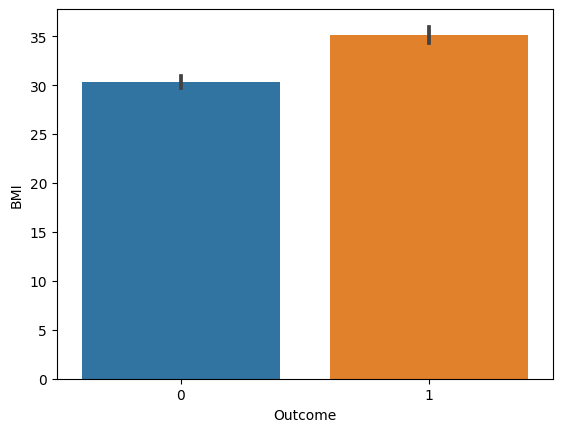

In [65]:
#당뇨병 발병에 따른 BMI 수치를 비교
sns.barplot(data=df, x='Outcome',y='BMI')

<Axes: xlabel='Outcome', ylabel='Glucose'>

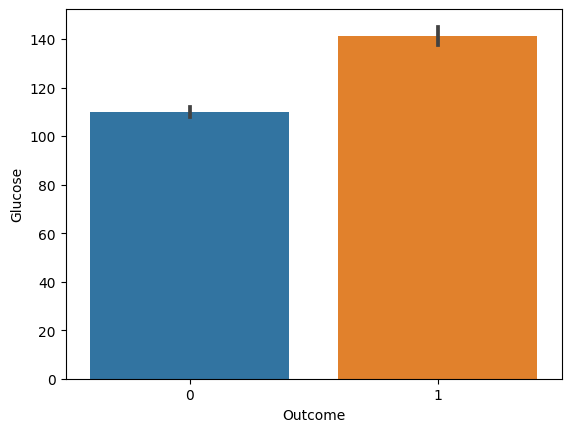

In [66]:
#당뇨병 발병에 따른 포도당 수치를 비교
sns.barplot(data=df, x='Outcome',y='Glucose')

<Axes: xlabel='Outcome', ylabel='Insulin'>

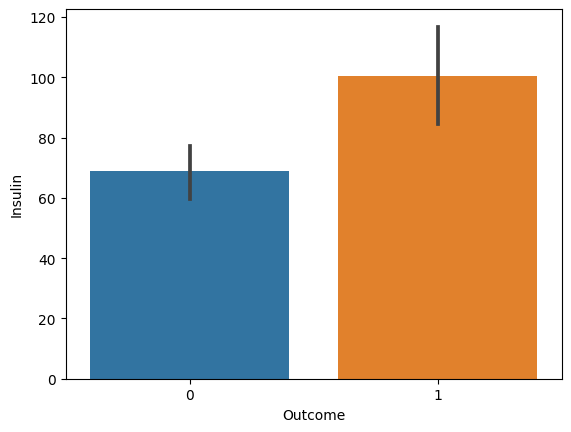

In [67]:
#Insulin 수치가 0이상인 관측치에 대해서 당뇨병 발병을 비교
sns.barplot(data=df, x='Outcome',y='Insulin')

<Axes: xlabel='Pregnancies', ylabel='Outcome'>

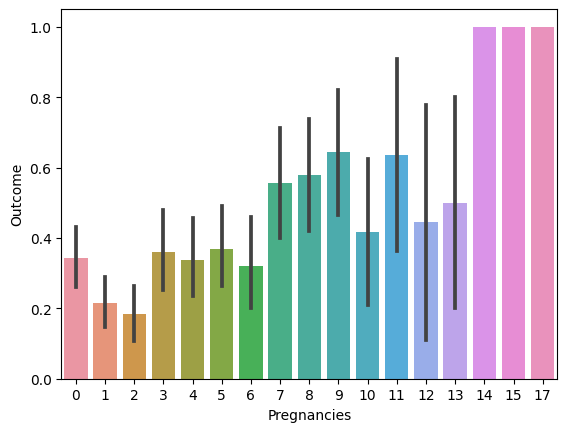

In [68]:
#임신횟수에 대해 당뇨병 발병비율을 비교
sns.barplot(data=df, x='Pregnancies' , y='Outcome')

<Axes: xlabel='Pregnancies', ylabel='Glucose'>

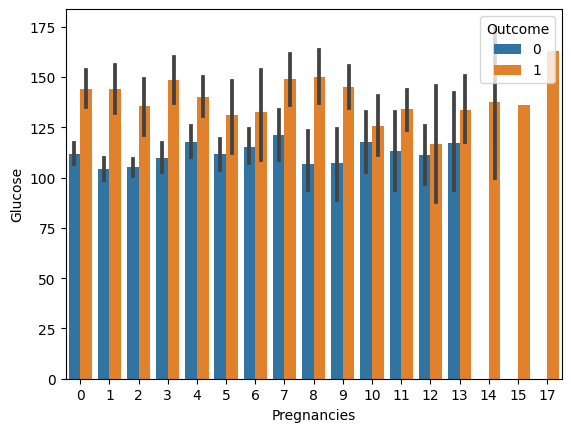

In [69]:
#임싯횟수에 따른 포도당 수치를 당뇨병 발병여부에 따라 시각화
sns.barplot(data=df, x='Pregnancies',y='Glucose',hue='Outcome')

<Axes: xlabel='Pregnancies', ylabel='BMI'>

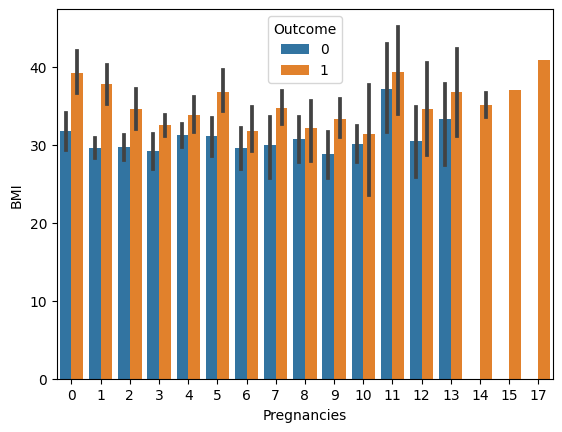

In [70]:
#임신횟수에 따른 체지방지수를 당뇨병 발병여부에 따라 시각화
sns.barplot(data=df, x='Pregnancies',y='BMI', hue='Outcome')

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

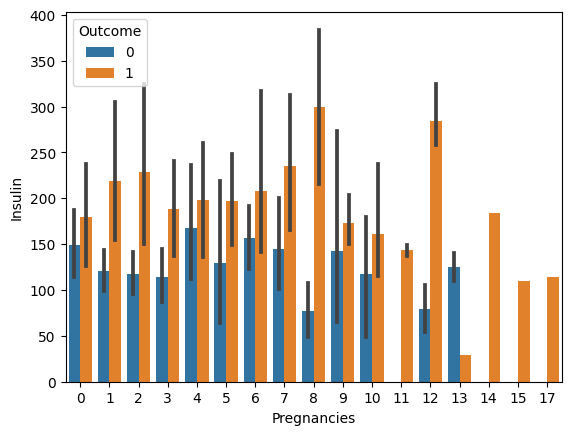

In [77]:
#임신횟수에 따른 인슐린수치를 당뇨병 발병여부에 따라 시각화
#인슐린수치에는 결측치가 많아 0보다 큰 값에 대해서만 그림
sns.barplot(data=df[df['Insulin']>0], x='Pregnancies', y='Insulin',hue='Outcome')

## 9.boxplot


<Axes: xlabel='Pregnancies', ylabel='Insulin'>

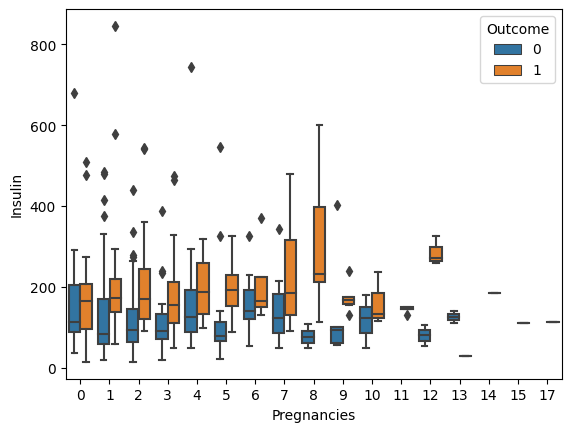

In [76]:
#임신횟수에 따른 인슐린수치를 당뇨병 발병여부에 따라 시각화
#인슐린수치에는 결측치가 많아 0보다 큰 값에 대해서만
sns.boxplot(data=df[df['Insulin']>0], x='Pregnancies',y='Insulin',hue='Outcome')

## 10. violinplot

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

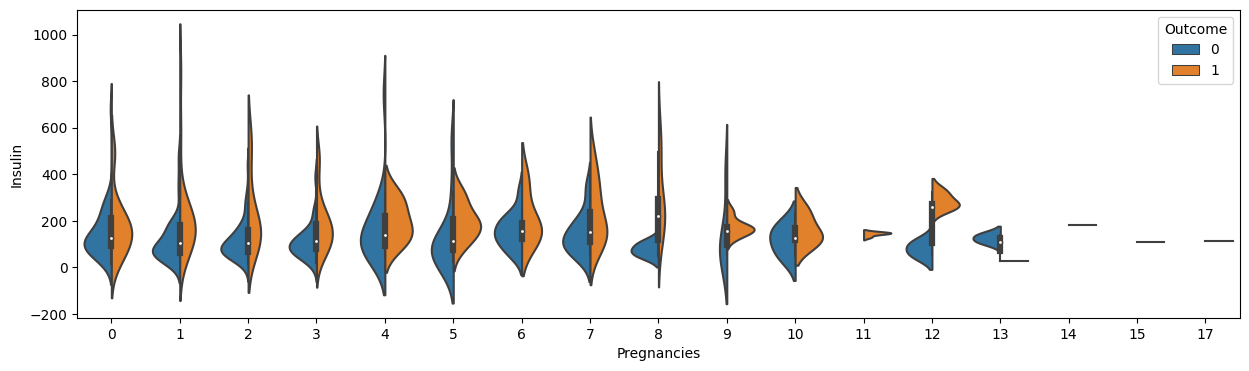

In [81]:
#위를 violinplot으로 시각화
plt.figure(figsize=(15,4))
sns.violinplot(data=df[df['Insulin']>0], x='Pregnancies', y='Insulin',hue='Outcome',split=True)

## 11. swarmplot

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 31.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 55.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 48.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 14.8% of the points cannot be plac

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 28.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 54.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


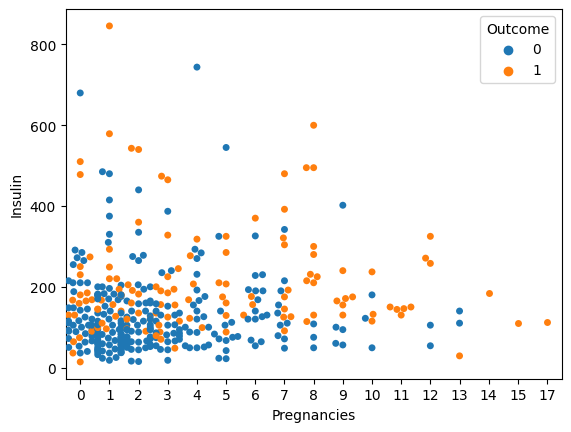

In [82]:
sns.swarmplot(data=df[df['Insulin']>0], x='Pregnancies',y='Insulin',hue='Outcome')

## 12.distplot

In [84]:
df_0 = df[df['Outcome']==0]
df_1 = df[df['Outcome']==1]
df_0.shape, df_1.shape

((500, 10), (268, 10))

<ipython-input-85-2dca70e7a2ce>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0['Pregnancies'])
<ipython-input-85-2dca70e7a2ce>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1['Pregnancies'])


<Axes: xlabel='Pregnancies', ylabel='Density'>

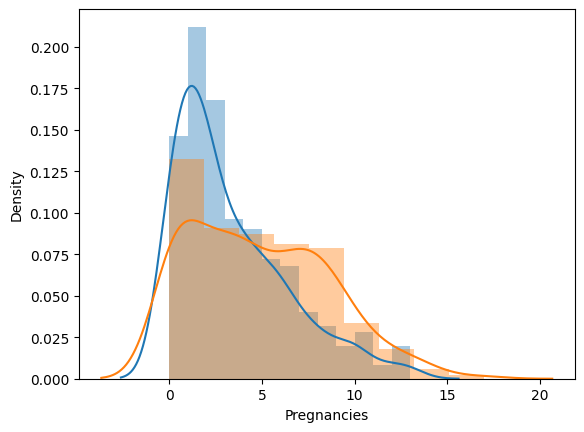

In [85]:
#임신횟수에 따른 당뇨병 발병여부를 시각화
sns.distplot(df_0['Pregnancies'])
sns.distplot(df_1['Pregnancies'])

<ipython-input-101-7e3d36b1291b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0['Age'],hist=False, label='a')
<ipython-input-101-7e3d36b1291b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1['Age'],hist=False, label='b')


<Axes: xlabel='Age', ylabel='Density'>

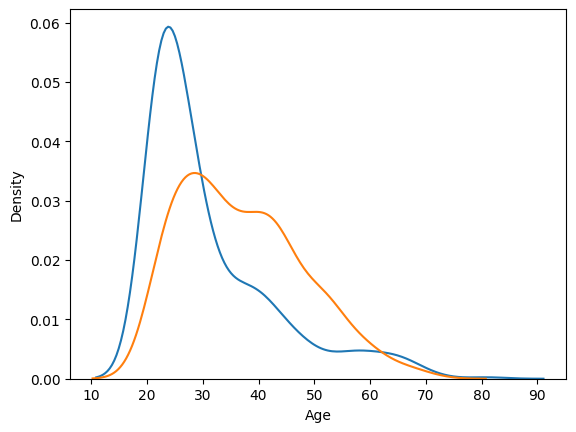

In [101]:
#나이에 따른 당뇨병 발병여부를 시각화
sns.distplot(df_0['Age'],hist=False, label='a')
sns.distplot(df_1['Age'],hist=False, label='b')

## 13.subplot

In [102]:
df['Pregnancies_high']

0      False
1      False
2       True
3      False
4      False
       ...  
763     True
764    False
765    False
766    False
767    False
Name: Pregnancies_high, Length: 768, dtype: bool

In [105]:
#bool값인 것을 int로 바꿈
df['Pregnancies_high'] = df['Pregnancies_high'].astype(int)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high
0,6,148,72,35,0,33.6,0.627,50,1,0
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,0
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,1
764,2,122,70,27,0,36.8,0.340,27,0,0
765,5,121,72,23,112,26.2,0.245,30,0,0
766,1,126,60,0,0,30.1,0.349,47,1,0


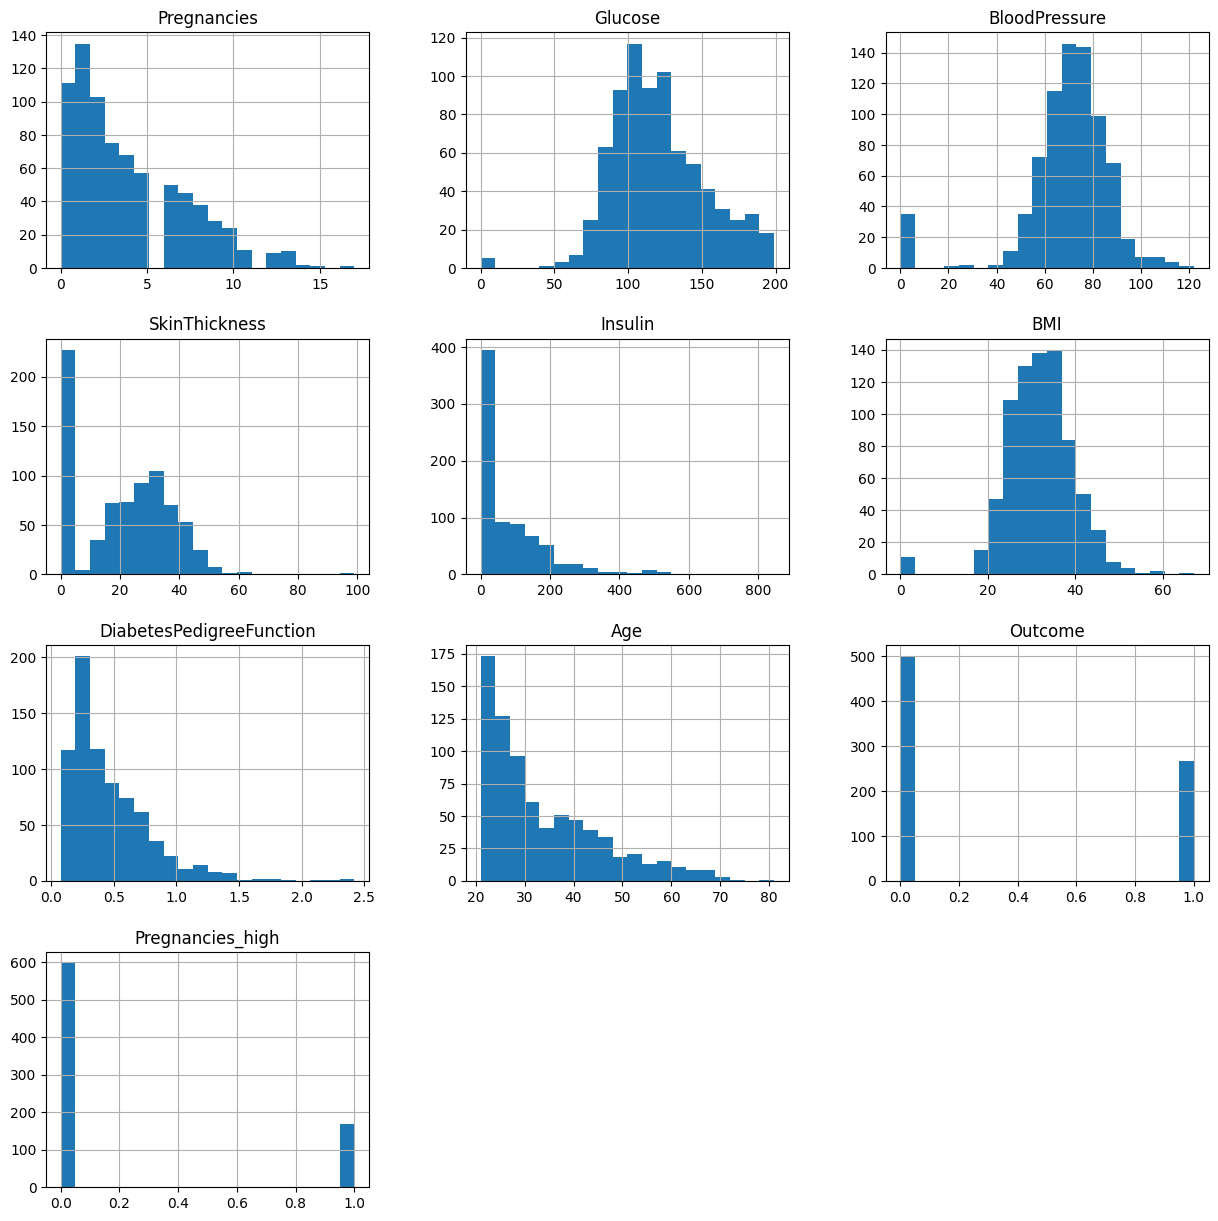

In [109]:
h = df.hist(figsize=(15,15),bins=20)

### 13.2 반복문을 통한 서브플롯그리기

In [117]:
#컬럼의 수 만큼 for 문을 만들어서 서브플롯으로 시각화
cols = df.columns[:-1].tolist()

<ipython-input-120-103f13f5c515>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_name], ax=axes[row][col])
<ipython-input-120-103f13f5c515>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_name], ax=axes[row][col])
<ipython-input-120-103f13f5c515>:5: UserWarning: 

`distplot` is a

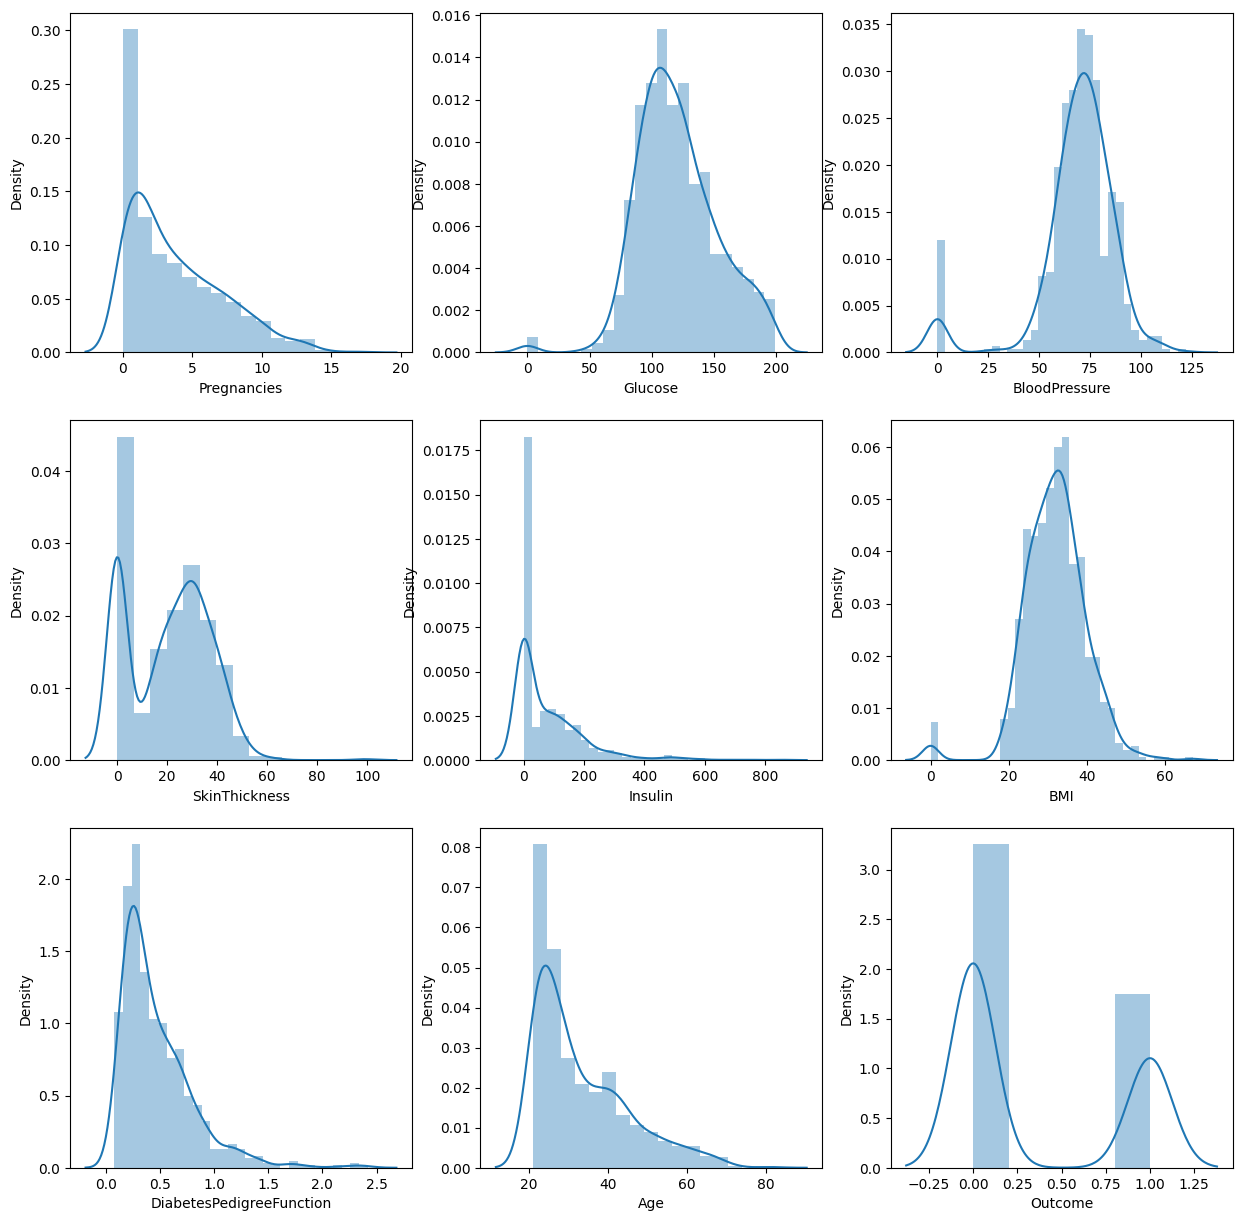

In [120]:
fig,axes= plt.subplots(nrows=3, ncols=3, figsize=(15,15))
for i,col_name in enumerate(cols):
  row= i // 3
  col= i % 3
  sns.distplot(df[col_name], ax=axes[row][col])


<ipython-input-123-3ffdf36ebe4a>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0[col_name], ax= axes[row][col])
<ipython-input-123-3ffdf36ebe4a>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1[col_name], ax= axes[row][col])
<ipython-input-123-3ffdf36ebe4a>:5: UserWarning: 

`distplot

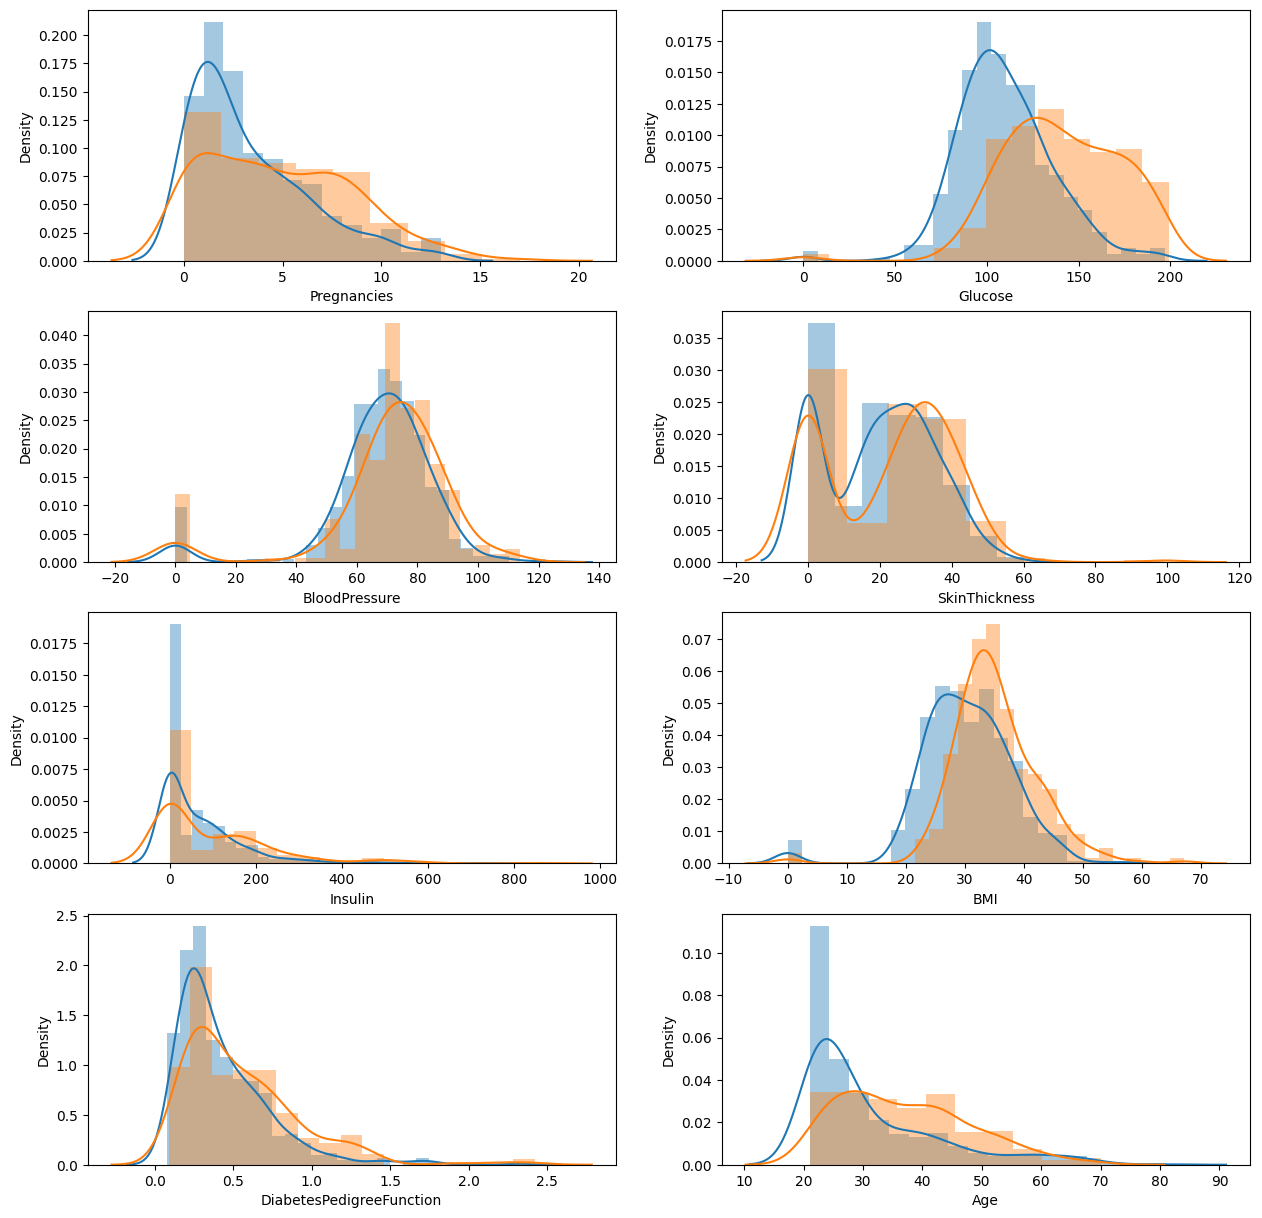

In [ ]:
fig,axes = plt.subplots(nrows=4, ncols=2, figsize=(15,15))
for i, col_name in enumerate(cols[:-1]):
  row = i // 2
  col = i % 2
  sns.distplot(df_0[col_name], ax= axes[row][col])
  sns.distplot(df_1[col_name], ax= axes[row][col])

### 13.2.2 violinplot

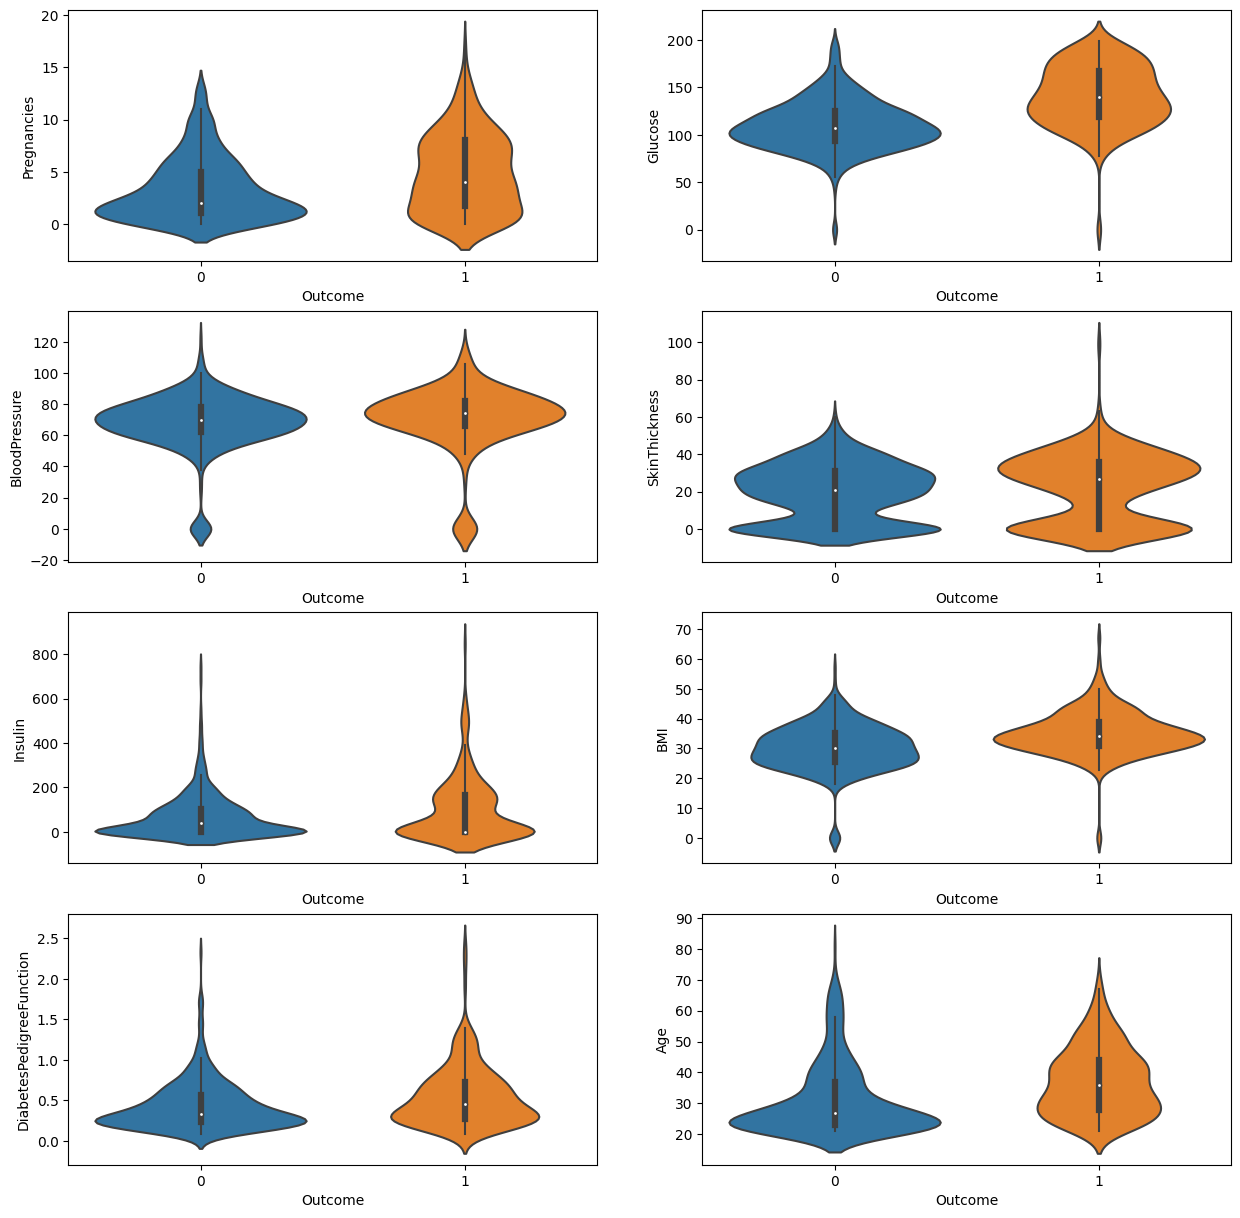

In [127]:
#violinplot으로 서브플롯을 그리기
fig,axes = plt.subplots(nrows=4, ncols=2, figsize=(15,15))
for i, col_name in enumerate(cols[:-1]):
  row = i // 2
  col = i % 2
  sns.violinplot(data=df, x='Outcome', y= col_name, ax=axes[row][col])

### 13.2.3 lmplot

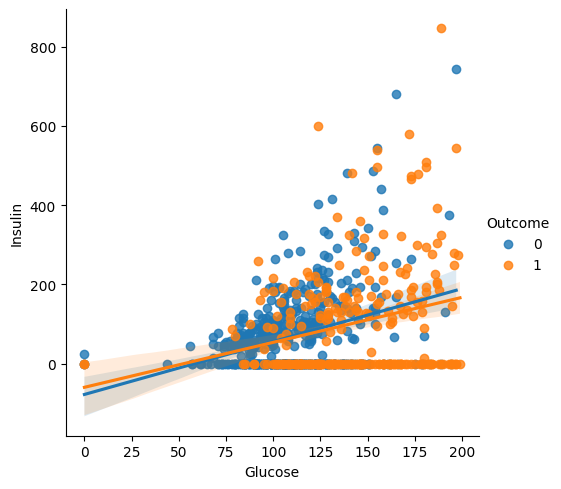

In [131]:
#Glucose와 Insulin을 Outcome으로 구분
sns.lmplot(data=df, x='Glucose', y='Insulin',hue='Outcome')

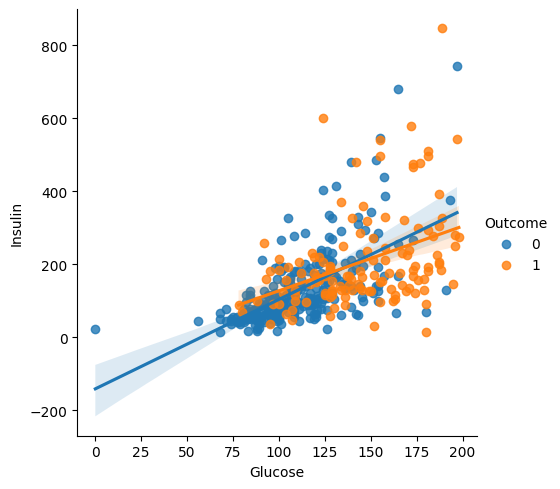

In [132]:
#Insulin 수치가 0 이상인 데이터로만 그리기
sns.lmplot(data= df[df['Insulin']>0], x='Glucose', y='Insulin', hue='Outcome')

### 13.2.4 pairplot

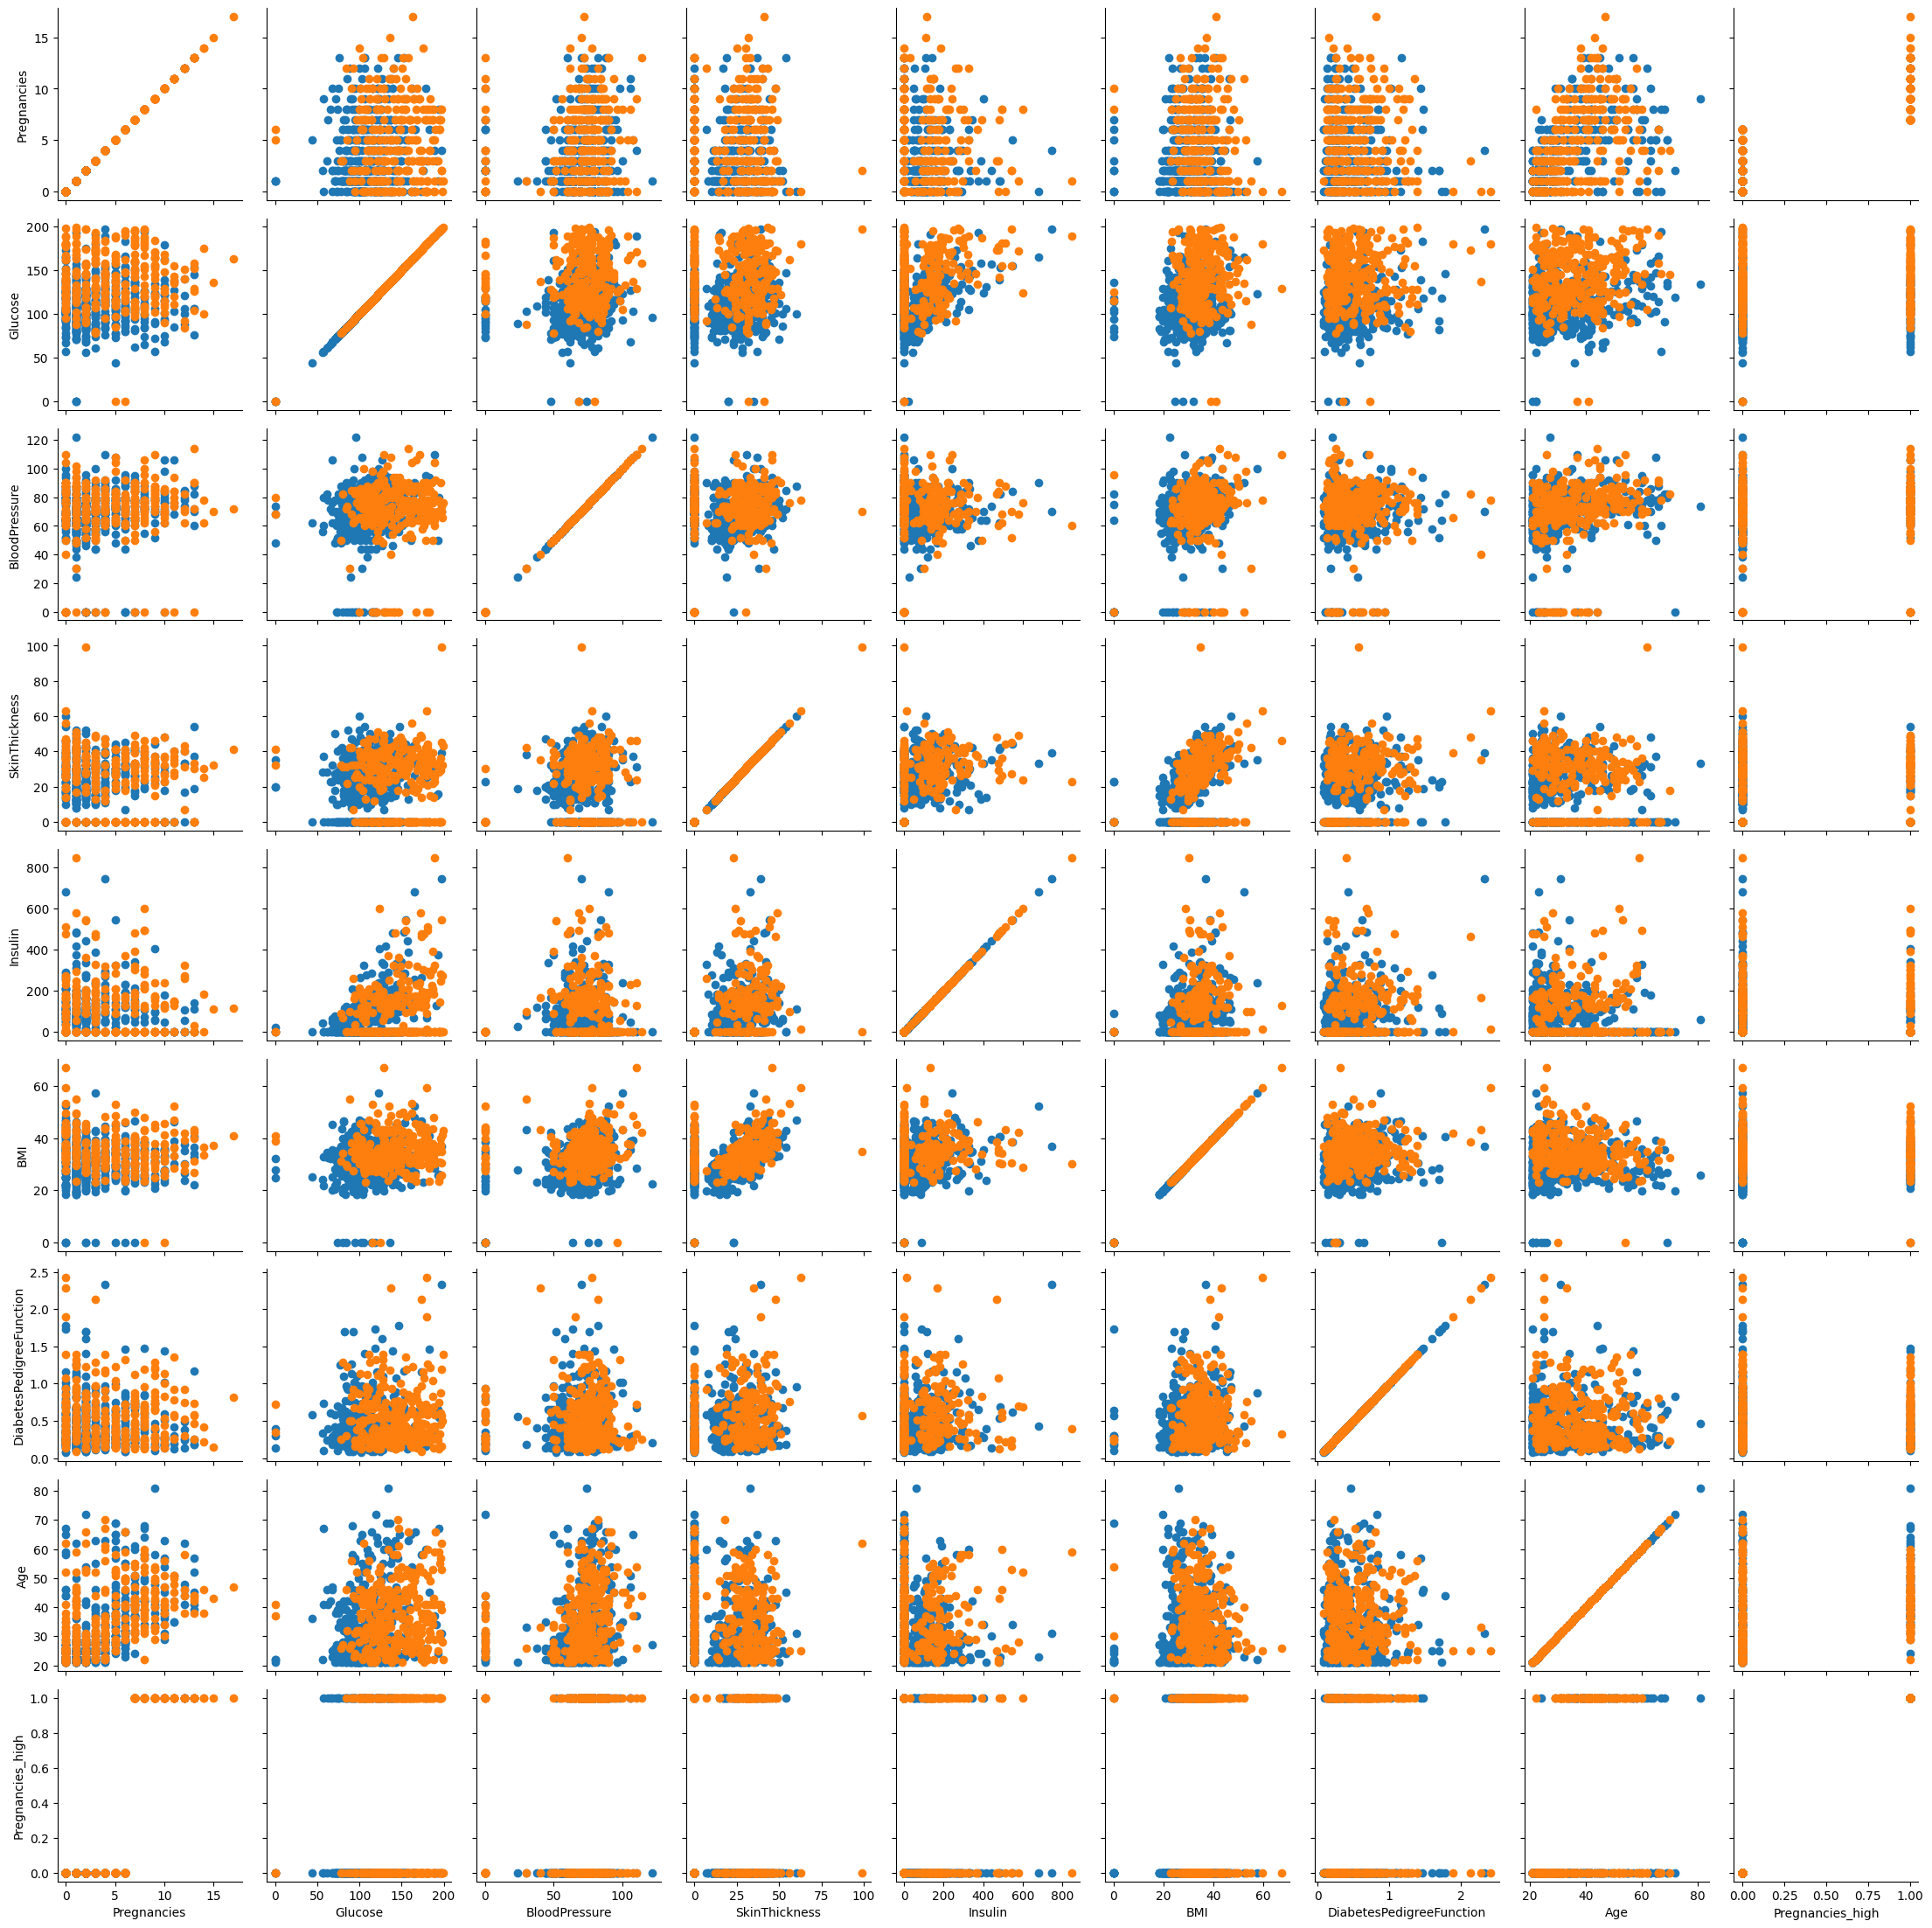

In [133]:
#PairGrid 를 통해 모든 변수에 대해 Outcome 에 따른 scatterplot을 그리기
g = sns.PairGrid(df, hue='Outcome')
g.map(plt.scatter)

## 14. 상관 분석

In [143]:
#정답값인 Outcome을 제외하고 feature 로 사용할 컬럼들에 대해 0을 결측치로 만들기
#상관계수구하기
df_matrix=df.iloc[:,:-2].replace(0,np.nan)
df_matrix['Outcome'] = df['Outcome']
df_matrix.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [144]:
df_corr = df_matrix.corr()
df_corr.style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.166329,0.285013,0.167298,0.104081,0.128207,-0.006459,0.550525,0.268218
Glucose,0.166329,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.285013,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.167298,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.104081,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.128207,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.006459,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.550525,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.268218,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


<Axes: >

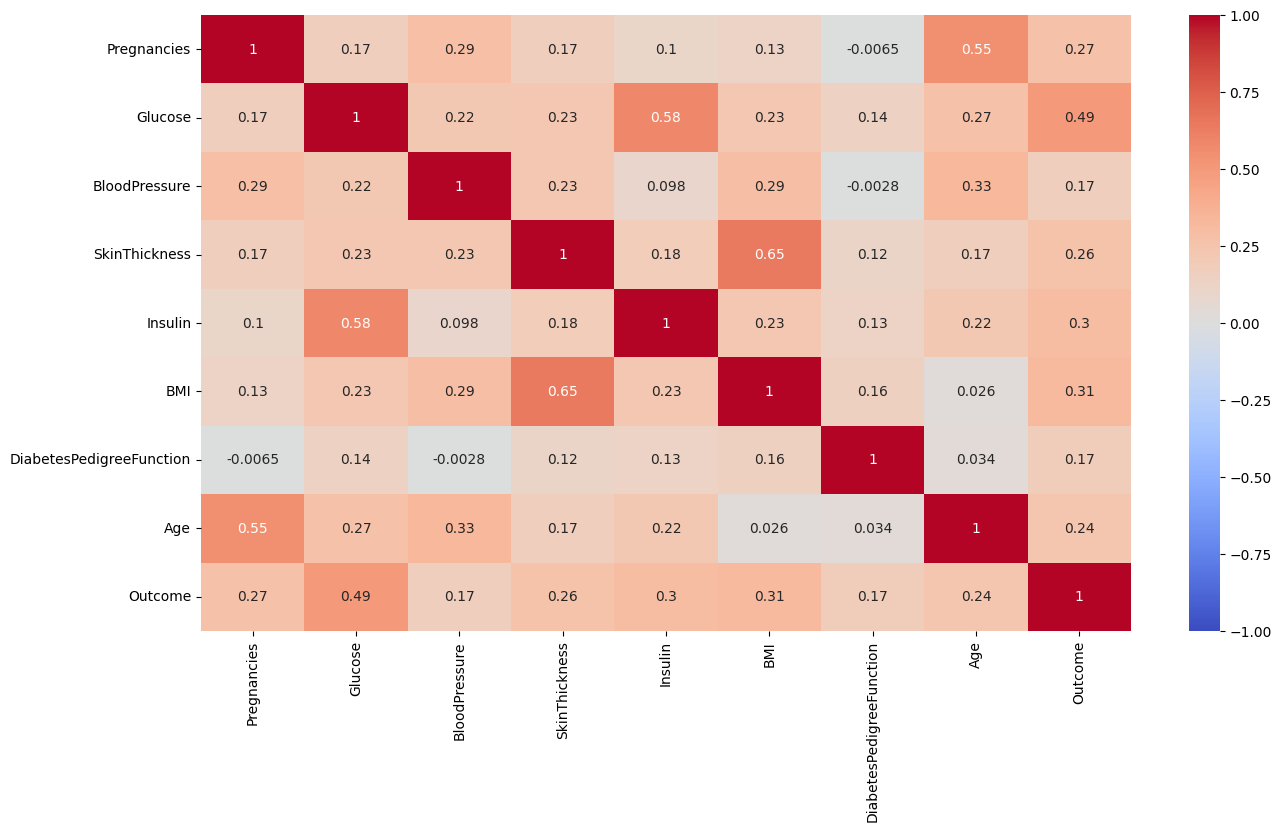

In [145]:
#위에서 구한 상관계수를 heatmap으로 시각화
plt.figure(figsize=(15,8))
sns.heatmap(df_corr,annot=True, vmax=1, vmin=-1, cmap='coolwarm')

In [146]:
#Outcome 수치에 대한 상관계수만 모아서 보기
df_corr['Outcome']

Pregnancies                 0.268218
Glucose                     0.494650
BloodPressure               0.170589
SkinThickness               0.259491
Insulin                     0.303454
BMI                         0.313680
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

### 14.1 상관계수가 높은 변수끼리 보기

<Axes: xlabel='Insulin', ylabel='Glucose'>

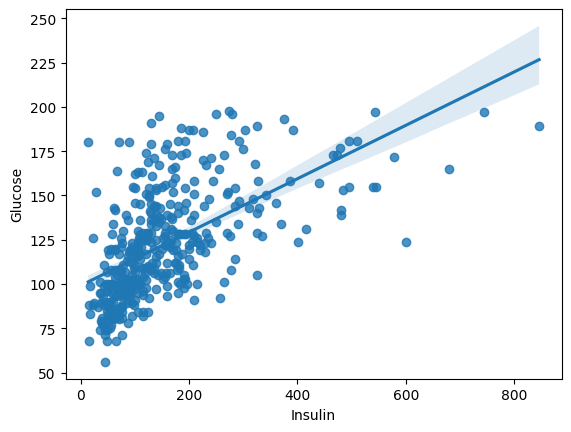

In [147]:
#Insulin과 Glucose로 regplot 그리기
sns.regplot(data=df_matrix, x='Insulin',y='Glucose')

<Axes: xlabel='Age', ylabel='Pregnancies'>

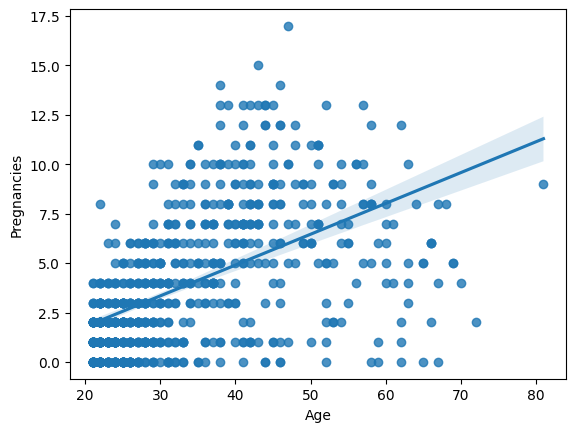

In [148]:
#Age와 Pregnancies
sns.regplot(data=df, x='Age', y='Pregnancies')

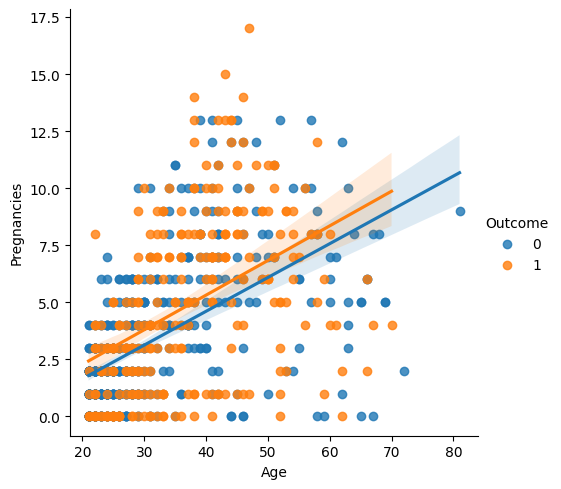

In [149]:
sns.lmplot(data=df, x='Age',y='Pregnancies', hue= 'Outcome')